<a href="https://colab.research.google.com/github/KaterynaSiniuta/ML-Hillel/blob/main/HW_14_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import models
from keras import layers
from keras import utils
from sklearn.metrics import confusion_matrix
import seaborn as sns


**ДЗ 14. CNN**

Реалізувати класифікацю датасету MNIST використавши Conv шари

Розв’язання задачі MNIST ансамблем нейромереж

Підготовка даних
MNIST – це набір рукописних цифр (28x28 пікселів, 10 класів). Завантажуємо та нормалізуємо дані.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# Загрузка даних

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


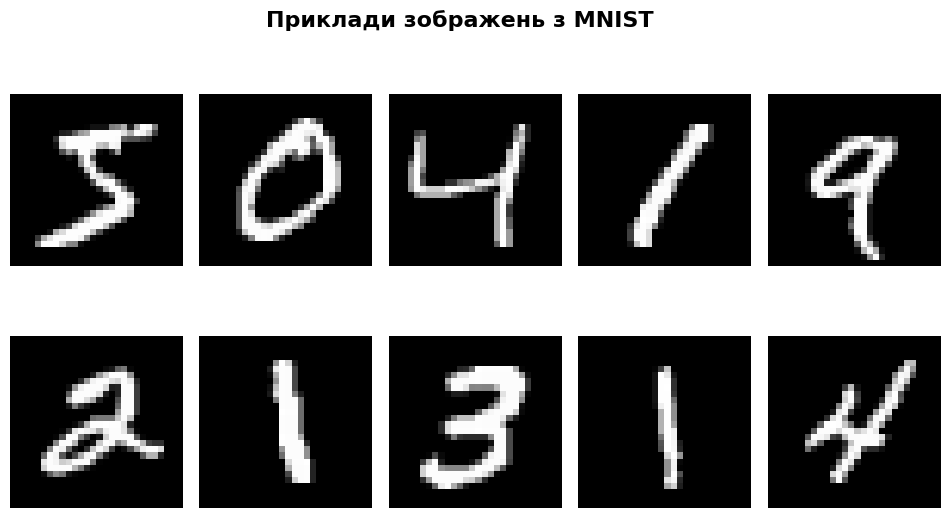

In [ ]:
# Візуалізація прикладів зображень MNIST без підписів цифр
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle("Приклади зображень з MNIST", fontsize=16, fontweight="bold")

for ax, img in zip(axes.flat, x_train[:10]):  # Беремо перші 10 зображень
    ax.imshow(img, cmap="gray")
    ax.axis("off")

plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Мінімальні відступи між зображеннями
plt.show()



In [ ]:
# Нормализація (значення від 0 до 1)

x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# One-hot encoding

y_train = to_categorical(y_train, 10)

y_test = to_categorical(y_test, 10)

In [ ]:
# Для LSTM преобразуем в последовательности

x_train_lstm = x_train.reshape(-1, 28, 28)

x_test_lstm = x_test.reshape(-1, 28, 28)

2. Створюємо моделі  


MLP (повнозв’язна мережа)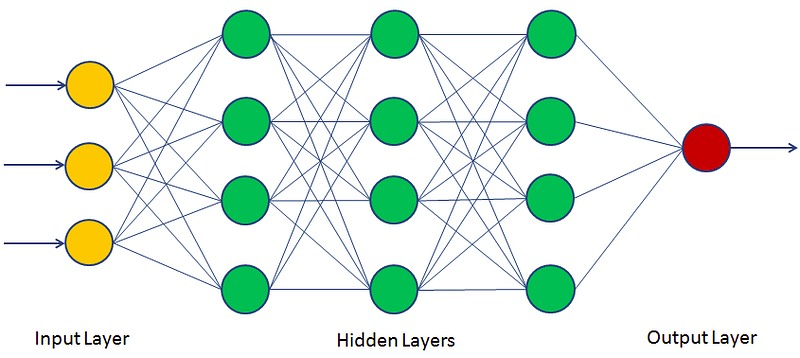

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

mlp = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


CNN (улучшенная сверточная сеть)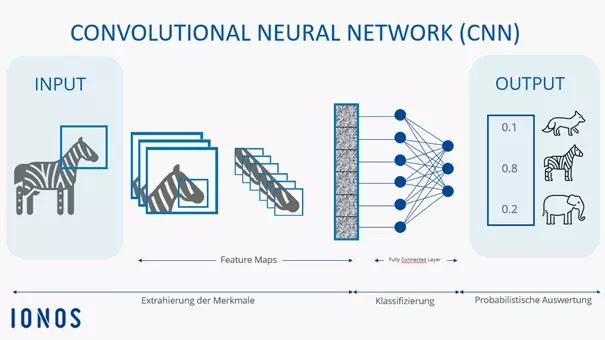

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense, Input, Reshape

cnn = Sequential([
    Input(shape=(28, 28)),
    Reshape((28, 28, 1)),  # Преобразование в 4D-тензор (для свертки)

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


LSTM (рекуррентная сеть)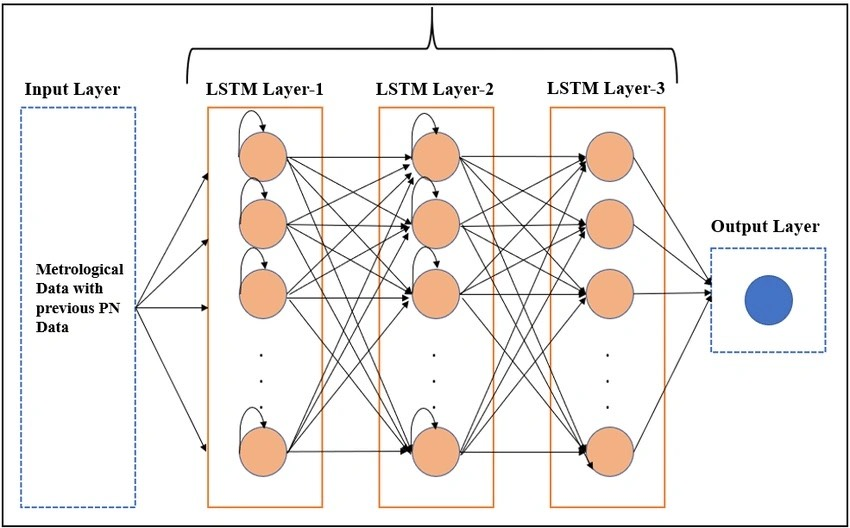

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

lstm = Sequential([
    Input(shape=(28, 28)),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


3. Навчання моделей

In [ ]:
mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

cnn.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

lstm.fit(x_train_lstm, y_train, epochs=10, batch_size=128, validation_data=(x_test_lstm, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8431 - loss: 0.5331 - val_accuracy: 0.9583 - val_loss: 0.1381
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9672 - loss: 0.1115 - val_accuracy: 0.9737 - val_loss: 0.0830
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9787 - loss: 0.0685 - val_accuracy: 0.9737 - val_loss: 0.0829
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9844 - loss: 0.0498 - val_accuracy: 0.9764 - val_loss: 0.0756
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9889 - loss: 0.0351 - val_accuracy: 0.9768 - val_loss: 0.0806
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9914 - loss: 0.0268 - val_accuracy: 0.9773 - val_loss: 0.0710
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9922 - loss: 0.0224 - val_accuracy: 0.9770 - val_loss: 0.0837
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9928 - loss: 0.0209 - val_accuracy:

4. Усереднення передбачень (Bagging)  

Навчені моделі видають ймовірності класів, тому усереднюємо їх передбачення:

In [ ]:
mlp_preds = mlp.predict(x_test)
cnn_preds = cnn.predict(x_test)
lstm_preds = lstm.predict(x_test_lstm)

# Усереднюємо

ensemble_preds = (mlp_preds + cnn_preds + lstm_preds) / 3

# З вирогідностей у класи

final_predictions = np.argmax(ensemble_preds, axis=1)

# Оцінюємо точність ансамбля

from sklearn.metrics import accuracy_score
true_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(true_labels, final_predictions)

print(f"Ансамблева точність (Bagging): {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Ансамблева точність (Bagging): 0.9930



Bagging (усереднення передбачень) вже підвищує точність за рахунок згладжування помилок моделей.